In [1]:
!pip install seaborn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 23.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!python -m pip install --upgrade pip

  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.


In [4]:
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
laptop_data=pd.read_csv('datasets/laptops.csv',encoding='ISO-8859-1',index_col=0)
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
laptop_data.shape

(1303, 12)

In [10]:
laptop_data.drop(['Product','ScreenResolution','Cpu','Memory','Gpu','Weight'],inplace=True,axis=1)

In [11]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
740,HP,Notebook,15.6,6GB,Windows 10,650.00
326,Lenovo,Notebook,17.3,4GB,Windows 10,589.00
529,Dell,Notebook,14.0,8GB,Windows 10,1279.73
251,HP,Notebook,15.6,8GB,Windows 10,559.00
597,Asus,2 in 1 Convertible,15.6,8GB,Windows 10,739.00
287,Lenovo,Gaming,15.6,8GB,Windows 10,829.00
912,Dell,2 in 1 Convertible,13.3,8GB,Windows 10,2013.10
1067,HP,Notebook,15.6,4GB,Windows 10,979.00
591,Dell,Netbook,11.6,4GB,Chrome OS,295.00
660,Dell,Ultrabook,13.3,8GB,Windows 10,1449.90


In [12]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [13]:
laptop_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

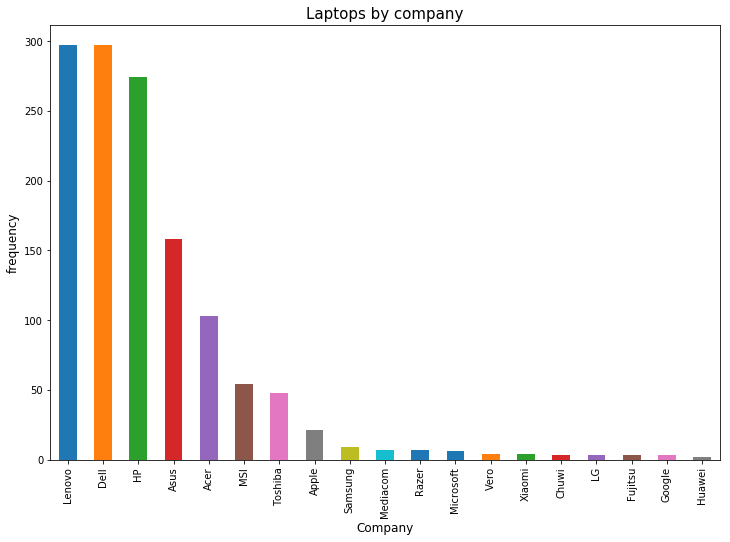

In [16]:
plt.figure(figsize=(12,8))
laptop_data['Company'].value_counts().plot(kind='bar')
plt.title('Laptops by company',fontsize=15)
plt.xlabel('Company',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.show()

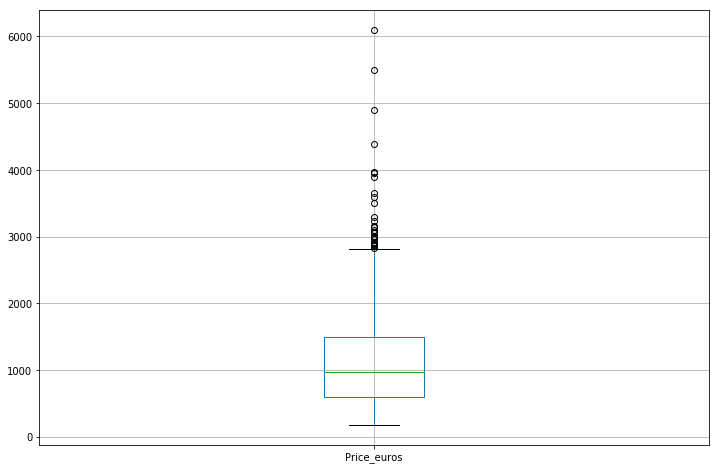

In [19]:
plt.figure(figsize=(12,8))
laptop_data[['Price_euros']].boxplot()

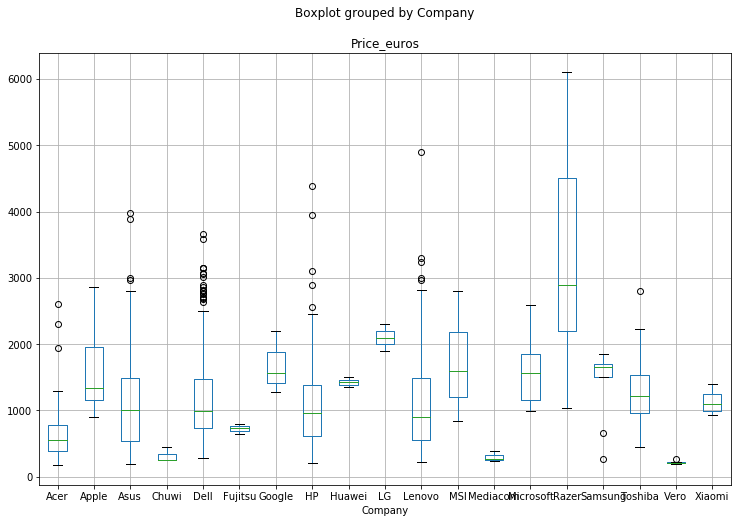

In [21]:
laptop_data.boxplot(by="Company",column=["Price_euros"], figsize=(12,8))
plt.show()

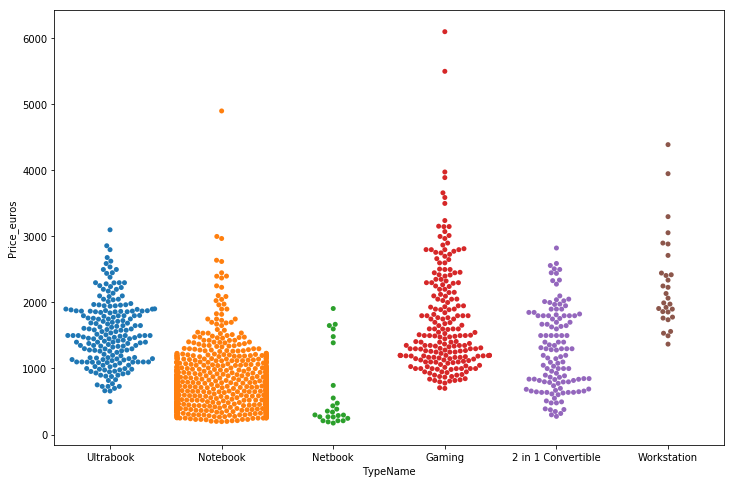

In [24]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='TypeName',y='Price_euros',data=laptop_data)


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
laptop_data['TypeName']=label_encoder.fit_transform(laptop_data['TypeName'])

In [26]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [27]:
dummy_laptop_data=pd.get_dummies(laptop_data)
dummy_laptop_data.head() #one hot encoding

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [28]:
x=dummy_laptop_data.drop('Price_euros',axis=1)
y=dummy_laptop_data['Price_euros']

In [32]:
from sklearn.model_selection import train_test_split #splitting data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [33]:
# creating regression model
from sklearn.linear_model import LinearRegression  #model
from sklearn.metrics import r2_score   #evaluating model

linear_regression=LinearRegression()  #instantiation
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
linear_regression.score(x_train,y_train)

0.6638414569399609

In [36]:
y_pred=linear_regression.predict(x_test)
r2_score(y_test,y_pred)

0.6483742196412885

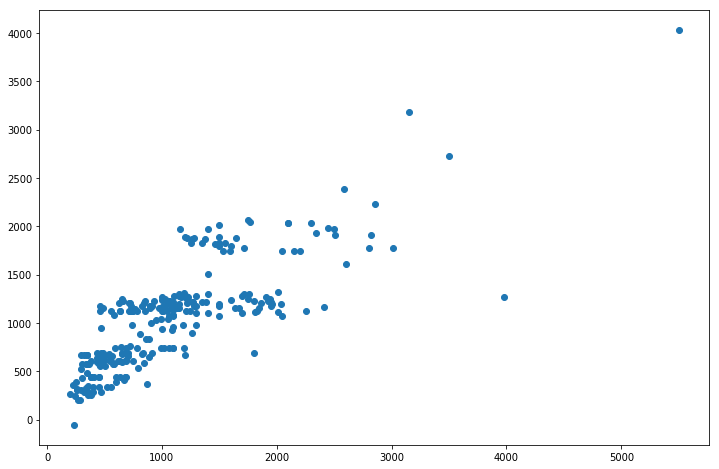

In [37]:
plt.figure(figsize=(12,8))

plt.scatter(y_test,y_pred)

plt.show()